🔍 Analyzing Themes for Commercial Bank of Ethiopia (CBE)...
✅ CBE Topics:
Topic 1: great, app, service, network, smart, cbe, thank, better, transaction, transfer
Topic 2: good, ok, amazing, screenshot, apps, one, job, update, love, special
Topic 3: best, app, like, wow, bank, keep, yes, awesome, cbe, working
Topic 4: nice, app, excellent, application, useful, cbe, screen, well, bank, please
Topic 5: easy, fast, use, banking, mobile, reliable, ever, app, perfect, life


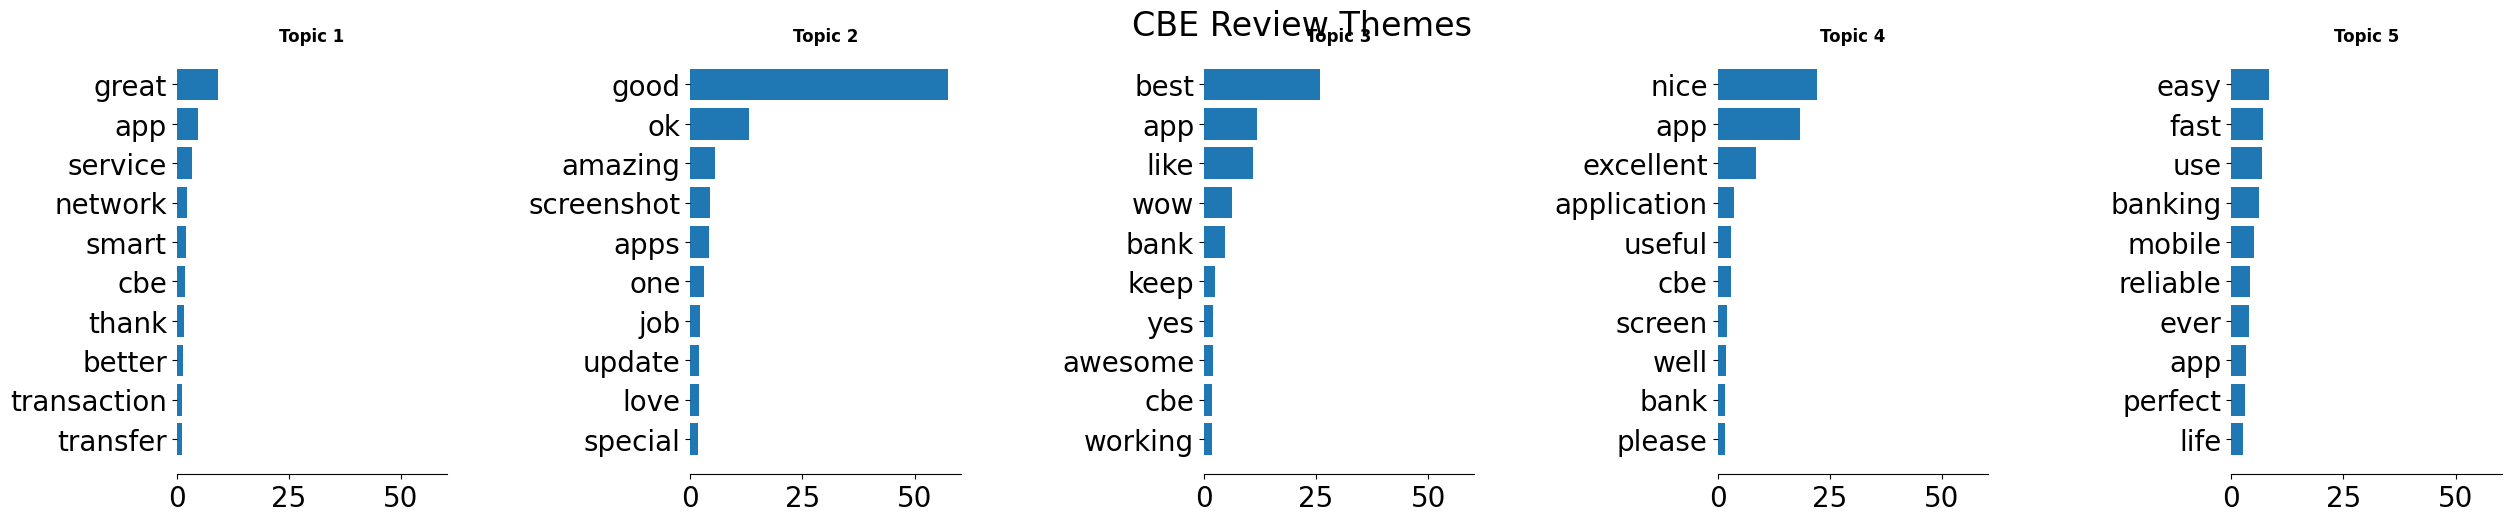


🔍 Analyzing Themes for Bank of Abyssinia (BOA)...
✅ BOA Topics:
Topic 1: best, app, wow, work, worst, banking, mobile, ever, bank, okay
Topic 2: great, ok, app, amazing, boa, please, bank, working, use, available
Topic 3: good, boa, application, app, service, bank, work, please, better, system
Topic 4: nice, app, working, thank, excellent, always, use, easy, useless, slow
Topic 5: app, bad, like, worest, love, much, horrible, android, update, money


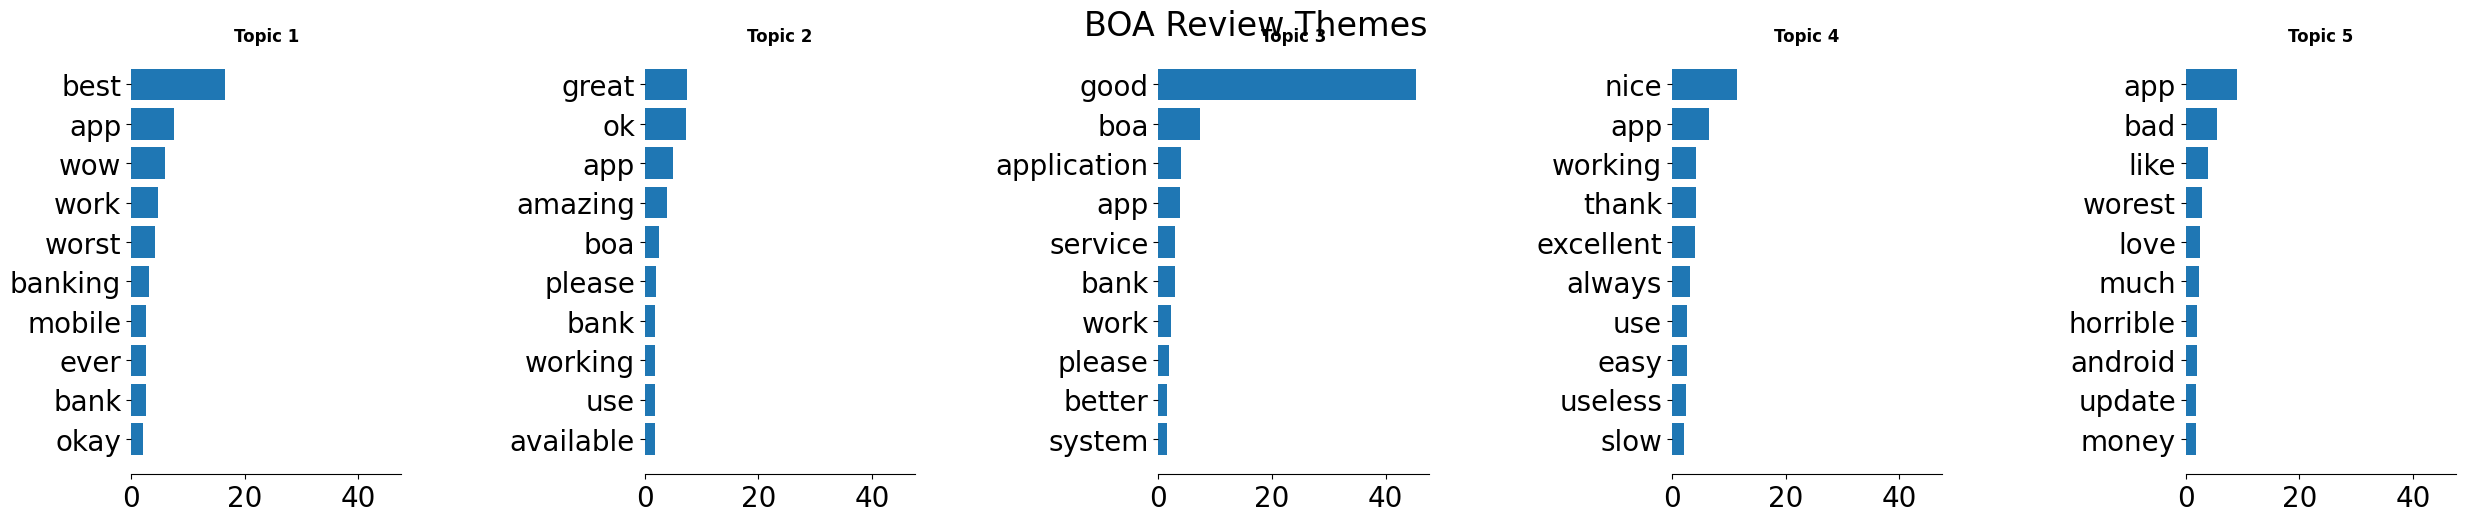


🔍 Analyzing Themes for Dashen Bank...
✅ Dashen Topics:
Topic 1: best, app, ever, dashen, application, banking, working, choice, loved, use
Topic 2: good, wow, app, excellent, step, always, ahead, one, slow, perfect
Topic 3: nice, app, dashen, super, bank, supper, really, ever, application, nic
Topic 4: banking, app, mobile, fast, convenient, one, bank, ok, game, super
Topic 5: amazing, use, easy, app, super, transaction, fast, good, dashen, application


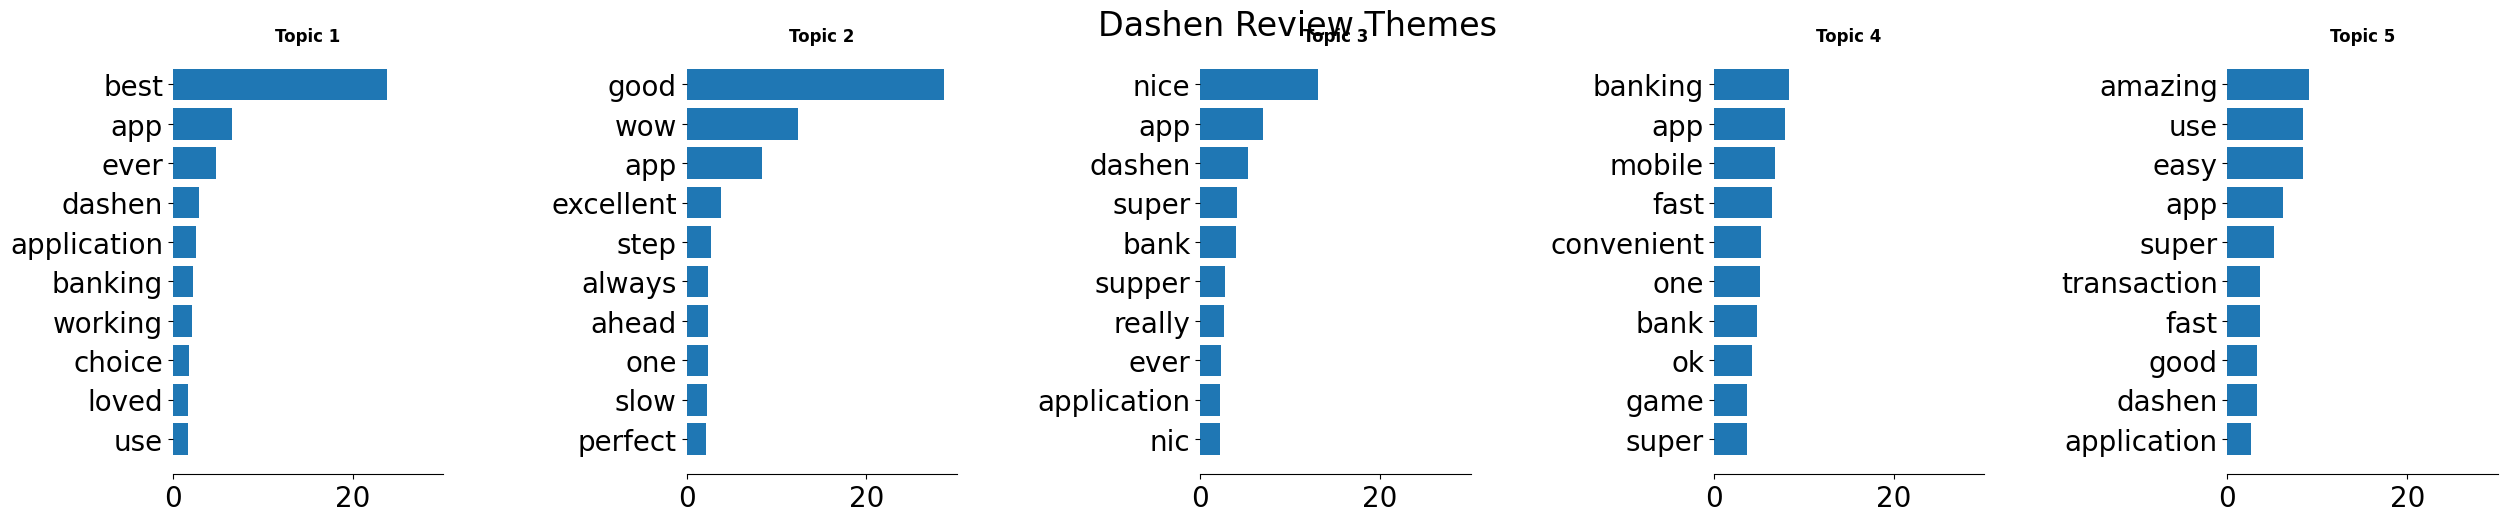


🎉 Thematic analysis complete! Visualizations saved to assets/images/


In [1]:
# %% [markdown]
# # 🧠 Thematic Analysis of App Reviews

# This notebook extracts key themes from user reviews using TF-IDF + LDA.

# %%
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import os

# %%
# Load Cleaned Review Data
df_cbe = pd.read_csv("../../data/processed/cbe_reviews_cleaned.csv")
df_boa = pd.read_csv("../../data/processed/boa_reviews_cleaned.csv")
df_dashen = pd.read_csv("../../data/processed/dashen_reviews_cleaned.csv")

# Create images directory if not exists
os.makedirs("../../assets/images", exist_ok=True)

# %%
# Helper Functions

def get_top_words(model, feature_names, n_top_words=10):
    """Get top words per topic."""
    topics = []
    for idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(f"Topic {idx+1}: {', '.join(top_words)}")
    return topics

def plot_top_words(model, feature_names, n_top_words=10, title=""):
    """Plot top words per topic."""
    fig, axes = plt.subplots(1, model.n_components, figsize=(30, 5), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights)
        ax.set_title(f'Topic {topic_idx + 1}', fontweight="bold")
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=24)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.savefig(f"../../assets/images/{title.replace(' ', '_').lower()}_topics.png")
    plt.show()

def generate_wordcloud(df, sentiment='negative', bank_name='Bank'):
    """Generate and save word cloud for given sentiment."""
    text = ' '.join(df[df['sentiment'] == sentiment]['cleaned_review'].fillna(""))
    if not text.strip():
        print(f"No {sentiment} reviews to generate word cloud for {bank_name}.")
        return
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{bank_name} - {sentiment.capitalize()} Reviews Word Cloud")
    plt.savefig(f"../../assets/images/{bank_name.lower()}_negative_wordcloud.png")
    plt.close()

# %%
# 🔍 CBE Theme Extraction (TF-IDF + LDA)

print("🔍 Analyzing Themes for Commercial Bank of Ethiopia (CBE)...")
df_cbe['cleaned_review'] = df_cbe['cleaned_review'].fillna("")

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_cbe = tfidf_vectorizer.fit_transform(df_cbe['cleaned_review'])

lda_cbe = LatentDirichletAllocation(n_components=5, random_state=42)
lda_cbe.fit(tfidf_cbe)

print("✅ CBE Topics:")
for t in get_top_words(lda_cbe, tfidf_vectorizer.get_feature_names_out()):
    print(t)

plot_top_words(lda_cbe, tfidf_vectorizer.get_feature_names_out(), title="CBE Review Themes")

generate_wordcloud(df_cbe, sentiment='negative', bank_name='CBE')

# %%
# 🔍 BOA Theme Extraction

print("\n🔍 Analyzing Themes for Bank of Abyssinia (BOA)...")
df_boa['cleaned_review'] = df_boa['cleaned_review'].fillna("")

tfidf_boa = tfidf_vectorizer.fit_transform(df_boa['cleaned_review'])
lda_boa = LatentDirichletAllocation(n_components=5, random_state=42)
lda_boa.fit(tfidf_boa)

print("✅ BOA Topics:")
for t in get_top_words(lda_boa, tfidf_vectorizer.get_feature_names_out()):
    print(t)

plot_top_words(lda_boa, tfidf_vectorizer.get_feature_names_out(), title="BOA Review Themes")

generate_wordcloud(df_boa, sentiment='negative', bank_name='BOA')

# %%
# 🔍 Dashen Theme Extraction

print("\n🔍 Analyzing Themes for Dashen Bank...")
df_dashen['cleaned_review'] = df_dashen['cleaned_review'].fillna("")

tfidf_dashen = tfidf_vectorizer.fit_transform(df_dashen['cleaned_review'])
lda_dashen = LatentDirichletAllocation(n_components=5, random_state=42)
lda_dashen.fit(tfidf_dashen)

print("✅ Dashen Topics:")
for t in get_top_words(lda_dashen, tfidf_vectorizer.get_feature_names_out()):
    print(t)

plot_top_words(lda_dashen, tfidf_vectorizer.get_feature_names_out(), title="Dashen Review Themes")

generate_wordcloud(df_dashen, sentiment='negative', bank_name='Dashen')

print("\n🎉 Thematic analysis complete! Visualizations saved to assets/images/")